## **Text Clustering with K-MEAN**
k-mean เป็นวิธีการสำหรับค้นหาจำนวนของคลัสเตอร์ (Cluster)จากข้อมูลที่ไม่ปรากฎ Class หรือ ไม่มี Label ซึ่งเรียกว่า Unlabeled Data วิธีนี้เป็นวิธี Unsupervised Learning

**โดยจะมีขั้นตอนการทำงาน** ดังต่อไปนี้ 

1.   นำเข้าข้อมูล (ที่ได้จากการ clean จากขั้นตอนก่อนหน้า)
2.   หาค่า K โดยใช้ Elbow Method
3.   จัดทำ model
4.   Visualization 


# Importing Libraries



In [ ]:
## for data
import pandas as pd
import numpy as np
## for plotting
import matplotlib.pyplot as plt
from wordcloud import WordCloud
## for processing
import re
import nltk
import gensim
import gensim.downloader as gensim_api
#for Tfidf
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize
## for model
from sklearn.cluster import KMeans


# **1.   นำเข้าข้อมูล (ที่ได้จากการ clean จากขั้นตอนก่อนหน้า)**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
df = pd.read_csv("/content/drive/My Drive/dataclean.csv")

Mounted at /content/drive


In [ ]:
df

Unnamed: 0  ...                                         text_clean
0             0  ...  association rule mining approach discover dema...
1             1  ...  improvement difficulty parameter equating base...
2             2  ...  data preparation reducing computational time t...
3             3  ...  overhead study telegraf realtime monitoring ag...
4             4  ...  method evaluation software testability object ...
..          ...  ...                                                ...
531         599  ...  instructional design development interactive m...
532         600  ...  selected topic humancomputer interactionsemina...
533         601  ...  network design managementtopics computer netwo...
534         602  ...  selected topic data sciencethe purpose selecte...
535         603  ...  selected topic data sciencethe purpose selecte...

[536 rows x 8 columns]

## **ทำการแบ่งคำ**
โดยใช้ TfidfVectorizer โดยใช้ TFIDF  ย่อมาจาก term frequency-inverse document frequency ซึ่งหมายถึงการเอา term frequency หรือ จำนวนครั้งที่แต่ละ word id ปรากฏ ในแต่ละ text หารด้วยจำนวน word ทั้งหมดใน text นั้น (เลยเป็น frequency แทนที่จะเป็น count) แล้วจึงนำมาคูณกับ inverse document frequency หรือ จำนวน document ทั้งหมด หารด้วย จำนวน document ที่แต่ละ word id ปรากฏอยู่ แล้ว take log เข้าไป*
> reference : https://medium.com/@witchapongdaroontham/



In [ ]:
vectorizer = TfidfVectorizer(stop_words='english' ,max_features = 20000)
X = vectorizer.fit_transform(df['text_clean'])
tf_idf_norm = normalize(X)
tf_idf_array = tf_idf_norm.toarray()

In [ ]:
print(vectorizer.get_feature_names())
print(X.shape)

['00001', '0001', '0012', '01', '012', '0240', '0297', '0305', '053', '068100', '078', '08', '085', '09', '095', '10', '100', '100ms', '101', '10fold', '11', '1181', '12', '13', '130', '13541', '137', '14', '1417', '143', '146', '15', '150', '158', '16', '167', '16core', '17', '17th', '18', '182', '19', '1910', '1996', '1998', '1fundamental', '1software', '1study', '20', '200', '2001', '20012012', '2002', '2003', '2004', '2004algorithms', '2005', '2005computational', '2006', '2007', '2007closed', '2007computer', '2007digital', '2008', '2009', '2010', '2010june', '2011', '2012', '2013', '2013acceleration', '2014', '2015', '2015algorithms', '2015formal', '2016', '2016data', '2017', '2017android', '2018', '2018bioluminescence', '2018diseases', '2018extraction', '2018natural', '2019', '2020', '2021', '22', '231', '24', '240', '240m', '242066', '246', '246084', '24hour', '25', '2500', '25000', '2523', '26', '2706', '278', '280', '2advanced', '2d', '2x3', '300', '31', '3216', '327', '35', '3

# **2.หาค่า K โดยใช้ Elbow Method**

เป็นการหาจุดที่เหมาะสมของจำนวน Clusters คือจุดที่กราฟมีลักษณะ “หัก” ที่สุด โดยเราจะใช้กราฟมาช่วยซึ่งมันจะแสดงผลการวัด Error ของผลรวมของระยะห่างระหว่าง Object กับ Centroid ของเรียกว่า Sum of square


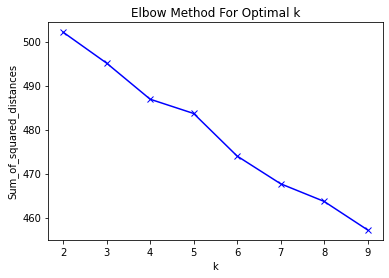

In [ ]:
Sum_of_squared_distances = []
K = range(2,10)
for k in K:
    km = KMeans(n_clusters=k, max_iter=200, n_init=10)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

จะเห็นได้ว่าจุดที่หักมากที่สุดอยู่ที่เลข 5 ดังนั้นเราจะแบ่ง cluster เท่ากับ 5

# **3.ขั้นตอนการจัดทำ model**



In [ ]:
true_k = 5
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10)
model.fit(X)
labels=model.labels_
wiki_cl=pd.DataFrame(list(zip(df['Title'],labels)),columns=['title','cluster'])
print(wiki_cl.sort_values(by=['cluster']))

                                                 title  cluster
0    An association rule mining approach to discove...        0
246  Automatic Text Summarization of Disaster warni...        0
245  A Speech Recognition-based Solution for Screen...        0
244  Indoor Navigation for Thammasat University Hos...        0
243  A Real-time Social Media Monitoring System for...        0
..                                                 ...      ...
474    PROBLEM SOLVING BASICS AND COMPUTER PROGRAMMING        4
316               INTRODUCTION TO COMPUTER PROGRAMMING        4
315               INTRODUCTION TO COMPUTER PROGRAMMING        4
401               INTRODUCTION TO COMPUTER PROGRAMMING        4
475               INTRODUCTION TO COMPUTER PROGRAMMING        4

[536 rows x 2 columns]


# ** 4.Visualization**
หลังจากจัดทำโมเดลที่แบ่งกลุ่มได้ทั้งหมด 3 cluster แล้ว เราก็จะแสดงออกมาดูในสองรูปแบบ ได้แก่


*   wordcloud
*   bar chart




Cluster: 0


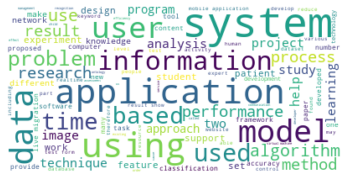

Cluster: 1


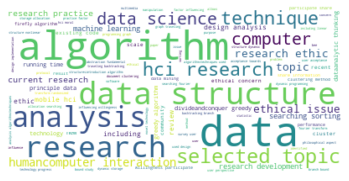

Cluster: 2


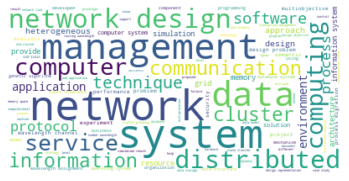

Cluster: 3


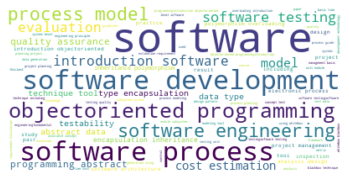

Cluster: 4


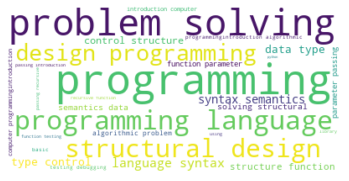

In [ ]:
result={'cluster':labels,'wiki':df['text_clean']}
result=pd.DataFrame(result)
for k in range(0,true_k):
    s=result[result.cluster==k]
    text=s['wiki'].str.cat(sep=' ')
    text=text.lower()
    text=' '.join([word for word in text.split()])
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
    print('Cluster: {}'.format(k))
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

In [ ]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = vectorizer.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs
dfs = get_top_features_cluster(tf_idf_array, labels, 20) 

In [ ]:
def plotWords(dfs, n_feats):
    plt.figure(figsize=(8, 4))
    for i in range(0, len(dfs)):
        plt.title(("Most Common Words in Cluster {}".format(i)), fontsize=10, fontweight='bold')
        sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[i][:n_feats])
        plt.show()

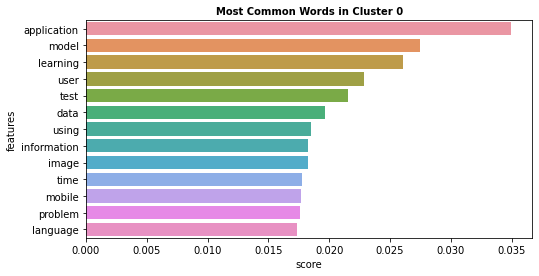

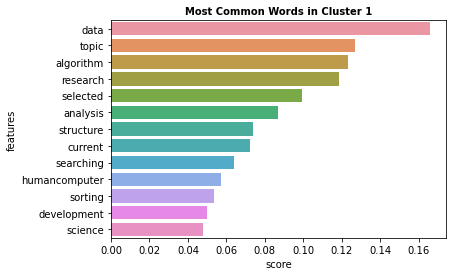

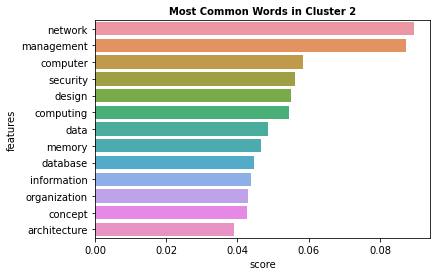

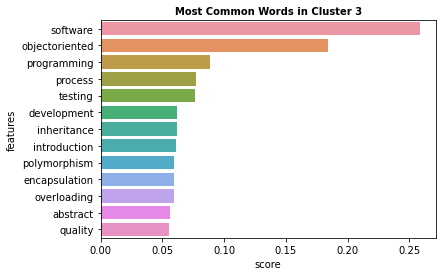

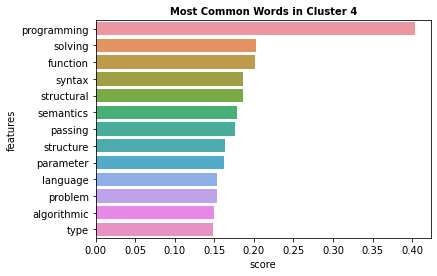

In [ ]:
plotWords(dfs, 13)

**ผลจากการแบ่งกลุ่ม** : พบว่าจากการนำเอาข้อมูลมาประมวลผล พบว่ามีการจัดกลุ่มได้ทั้งหมด 5 กลุ่ม 
ซึ่งจากคำของแต่ละกลุ่ม ก็มีความเด่นชัดในเรื่องของความเชียวชาญ


> cluster 0 : application,model,learning : มีความเชี่ยวชาญเกี่ยวข้องกับการประยุกต์ใช้machine learningในการสร้างโมเดล


> cluster 1 : data,topic,algorithm : มีความเชี่ยวชาญเกี่ยวข้องกับทางด้านของdata structure and algorithms


> cluster 2 : network,computer,security : มีความเชี่ยวชาญเกี่ยวกับทางด้านของnetwork security


> cluster 3 : software,programming,testing : มีความเชี่ยวชาญเกี่ยวข้องกับทางด้านของ Software Testing


> cluster 4 : programming,sturcture,algoritm : มีความเชี่ยวชาญเกี่ยวกับการเขียนโปรแกรมเกี่ยวกับการแก้ปัญหา



## **แบ่งข้อมูลเพื่อหาความเชียวชาญของอาจารย์แต่ละคน**

# ddp

In [ ]:
df1=df.loc[df['Teacher'] == 'ddp']

Unnamed: 0  ...                                         text_clean
14           14  ...  association extraction functional testing scen...
47           47  ...  formal verification abap z specificationthis p...
59           59  ...  formal verification concurrency gogo programmi...
81           81  ...  formal verification concurrency error javascri...
82           82  ...  formal verification jade behaviour modeling ap...
83           83  ...  formal verification multiagent system based ja...
90           90  ...  hierarchical verification wsbpelthis paper pro...
94           94  ...  formal verification wsbpel using timed trace t...
188         188  ...  partial order reduction detecting safety timin...
193         193  ...  partial order reduction detecting safety timin...
322         344  ...  computer organization architecturedata represe...
349         383  ...  formal methodsintroduction different mathemati...
350         384  ...  formal methodsintroduction different mathemati...
369         411  ...  design analysis algorithmstechniques used desi...
372         414  ...  theory computationfundamentals abstract machin...
410         460  ...  introduction computer system organizationunder...
434         498  ...  design analysis algorithmstechniques used desi...
479         547  ...  introduction computer system organizationunder...
480         548  ...  computer architecture operating systemsinstruc...
498         566  ...  autotmata theoryfundamentals abstract machine ...

[20 rows x 8 columns]

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english' ,max_features = 20000)
X1 = vectorizer.fit_transform(df1['text_clean'])
tf_idf_norm = normalize(X1)
tf_idf_array = tf_idf_norm.toarray()

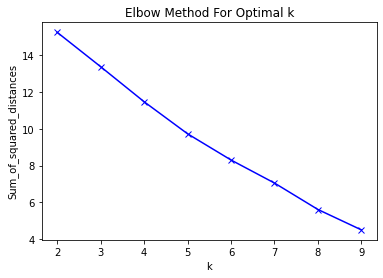

In [ ]:
Sum_of_squared_distances = []
K = range(2,10)
for k in K:
    km = KMeans(n_clusters=k, max_iter=200, n_init=10)
    km = km.fit(X1)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
n =5
model = KMeans(n_clusters=n, init='k-means++', max_iter=200, n_init=10)
model.fit(X1)
labels=model.labels_
wiki_cl=pd.DataFrame(list(zip(df['Title'],labels)),columns=['title','cluster'])

Cluster: 0


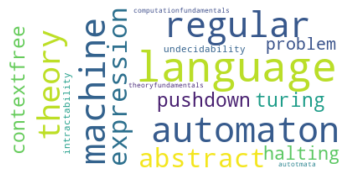

Cluster: 1


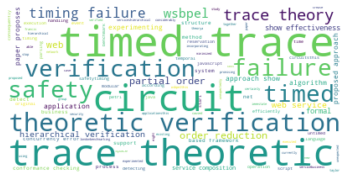

Cluster: 2


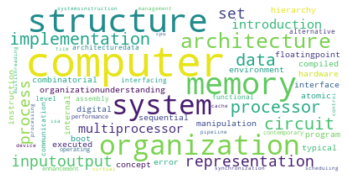

Cluster: 3


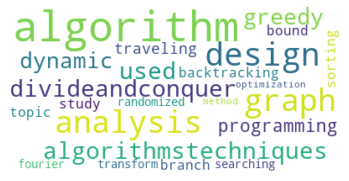

Cluster: 4


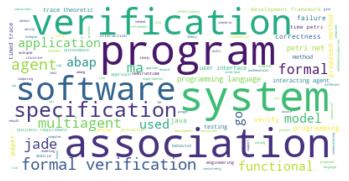

In [ ]:
result={'cluster':labels,'wiki':df1['text_clean']}
result=pd.DataFrame(result)
for k in range(0,n):
    s=result[result.cluster==k]
    text=s['wiki'].str.cat(sep=' ')
    text=text.lower()
    text=' '.join([word for word in text.split()])
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
    print('Cluster: {}'.format(k))
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

**ผลจากการแบ่งกลุ่ม** : พบว่าจากการนำเอาข้อมูลมาประมวลผล พบว่ามีการจัดกลุ่มได้ทั้งหมด 5 กลุ่ม ซึ่งจากคำของแต่ละกลุ่ม ก็มีความเด่นชัดในเรื่องของความเชียวชาญ

>  cluster 0 : มีความเชี่ยวชาญเกี่ยวกับด้านโมเดลออโตโมตาของเครื่องจักรสถานจำกัด

>  cluster 1 : มีความเชี่ยวชาญเกี่ยวกับด้านการทวนสอบเชิงรูปนัย (Time trace theory)

>  cluster 2 : มีความเชี่ยวชาญแนวโน้มทางด้านโครงสร้างระบบคอมพิวเตอร์ (Organization of Computer)

>  cluster 3 : มีความเชี่ยวชาญเกี่ยวกับด้านการวิเคราะห์และออกแบบขั้นตอนวิธี (Analysis and Design of Algorithms)

>  cluster 4 : มีความเชี่ยวชาญเกี่ยวกับทางด้านระบบตรวจสอบโปรแกรมคอมพิวเตอร์

# scw

In [ ]:
df2=df.loc[df['Teacher'] == 'scw']
df2

Unnamed: 0  ...                                         text_clean
92           92  ...  thai face cartoon detection recognition using ...
112         112  ...  flower search image mobile phonewe propose ima...
161         161  ...  fuzzy approach personalized product clustering...
164         164  ...  sieving ann emotionbased movie clip classifica...
184         184  ...  distinguishing excitement movie clip using mov...
233         234  ...  answer sheet grading applicationpresent multip...
234         235  ...  banknote recognition applicationbanknote recog...
272         277  ...  automatic car brand classification systemthe o...
289         298  ...  alzheimers patient screening system brain imag...
290         299  ...  mobile application pterygium analysis cataract...
312         328  ...  problem solving basic computer programmingalgo...
314         330  ...  introduction computer programmingintroduction ...
348         382  ...  selected topic multimedia content analysissele...
363         400  ...  database system 1fundamental database concept ...
383         426  ...  digital image processingdigital image fundamen...
394         442  ...  introduction computer programmingintroduction ...
443         507  ...  database system 1fundamental database concept ...
454         522  ...  computer programming fundamentalsprocedural pr...
527         595  ...  digital image processingdeterministic stochast...

[19 rows x 8 columns]

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english' ,max_features = 20000)
X2 = vectorizer.fit_transform(df2['text_clean'])
tf_idf_norm = normalize(X2)
tf_idf_array = tf_idf_norm.toarray()

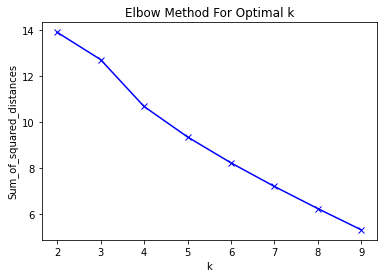

In [ ]:
Sum_of_squared_distances = []
K = range(2,10)
for k in K:
    km = KMeans(n_clusters=k, max_iter=200, n_init=10)
    km = km.fit(X2)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
n=4
model = KMeans(n_clusters=n, init='k-means++', max_iter=200, n_init=10)
model.fit(X2)
labels=model.labels_
wiki_cl=pd.DataFrame(list(zip(df['Title'],labels)),columns=['title','cluster'])

Cluster: 0


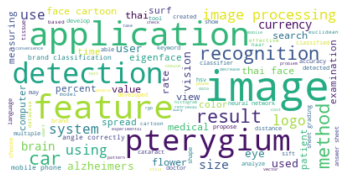

Cluster: 1


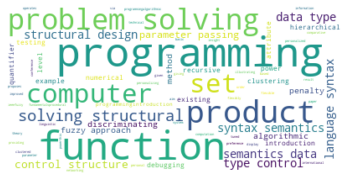

Cluster: 2


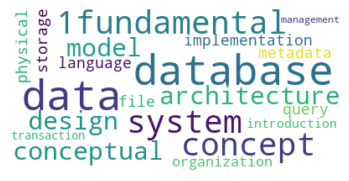

Cluster: 3


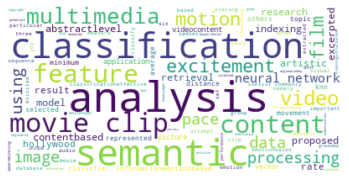

In [ ]:
result={'cluster':labels,'wiki':df2['text_clean']}
result=pd.DataFrame(result)
for k in range(0,n):
    s=result[result.cluster==k]
    text=s['wiki'].str.cat(sep=' ')
    text=text.lower()
    text=' '.join([word for word in text.split()])
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
    print('Cluster: {}'.format(k))
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

**ผลจากการแบ่งกลุ่ม** : พบว่าจากการนำเอาข้อมูลมาประมวลผล พบว่ามีการจัดกลุ่มได้ทั้งหมด 4 กลุ่ม ซึ่งจากคำของแต่ละกลุ่ม ก็มีความเด่นชัดในเรื่องของความเชียวชาญ

>  cluster 0 : มีความเชี่ยวชาญเกี่ยวกับด้านการประมวลผลภาพ (Image processing)

>  cluster 1 : มีความเชี่ยวชาญเกี่ยวกับด้านการเขียนโปรแกรมเชิงฟังก์ชัน (Functional Programming)

>  cluster 2 : มีความเชี่ยวชาญเกี่ยวกับด้านระบบฐานข้อมูลเบื้องต้น

>  cluster 3 : มีความเชี่ยวชาญเกี่ยวกับด้านการวิเคราะห์เชิงความหมาย ความรู้สึกและอารมณ์


# ssr

In [ ]:
df3=df.loc[df['Teacher'] == 'ssr']
df3

Unnamed: 0  ...                                         text_clean
4             4  ...  method evaluation software testability object ...
33           33  ...  safety property analysis serviceoriented iot b...
39           39  ...  refactoring opportunity identification methodo...
61           61  ...  changeability prediction model java class base...
77           77  ...  automatic code location identification replaci...
109         109  ...  apsec 2013 tutorial industry track postgraduat...
110         110  ...  apsec 2013 tutorial industry track postgraduat...
111         111  ...  modeling code analyzability method level j2ee ...
122         122  ...  identifying refactoring formal model based dat...
129         129  ...  using software metric select refactoring long ...
237         238  ...  hand free picking system warehousethis project...
238         239  ...  motion tracking application beacon preventing ...
239         240  ...  preschool nutrition care systemnutrition one i...
240         241  ...  voice assistant warehouse managementfrom study...
241         242  ...  tracking system elderlythai society present da...
242         243  ...  door access control monitoring system using sm...
324         347  ...  introduction software engineeringfundamental s...
325         349  ...  practice pattern objectoriented programmingpri...
354         389  ...  objectoriented programmingdeveloping analytica...
364         401  ...  objectoriented analysis designfundamental data...
365         403  ...  objectoriented analysis designobjectoriented c...
384         427  ...  componentbased software developmentconcepts co...
418         472  ...  introduction software engineeringfundamental s...
422         477  ...  practice pattern objectoriented programmingint...
429         492  ...  objectoriented conceptsdeveloping analytical p...
432         496  ...  social professional ethicssocial context compu...
457         525  ...  objectoriented programmingdesign model objecto...
461         529  ...  introduction software testingsoftware testing ...
465         533  ...  software configuration managementknowledge fun...
466         534  ...  seminar software engineeringseminar field trip...
489         557  ...  introduction software testingsoftware testing ...
495         563  ...  social professional ethicssocial context compu...
524         592  ...  seminar software engineeringseminar field trip...

[33 rows x 8 columns]

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english' ,max_features = 20000)
X3 = vectorizer.fit_transform(df3['text_clean'])
tf_idf_norm = normalize(X3)
tf_idf_array = tf_idf_norm.toarray()

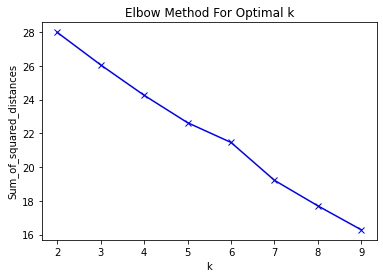

In [ ]:
Sum_of_squared_distances = []
K = range(2,10)
for k in K:
    km = KMeans(n_clusters=k, max_iter=200, n_init=10)
    km = km.fit(X3)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
n = 5
model = KMeans(n_clusters=n, init='k-means++', max_iter=200, n_init=10)
model.fit(X3)
labels=model.labels_
wiki_cl=pd.DataFrame(list(zip(df['Title'],labels)),columns=['title','cluster'])

                                                title  cluster
0   An association rule mining approach to discove...        2
1   Improvement of Difficulty Parameter Equating b...        3
2   Data Preparation for Reducing Computational Ti...        2
3   Overhead study of telegraf as a real-time moni...        2
4   Method Evaluation for Software Testability on ...        2
5   Sentiment Classification on Thai Social Media ...        3
6   Extraction of Trend Keywords from Thai Twitter...        3
7   Toponym Extraction in Thai Tweets Using a Hybr...        2
8   Simulation analysis of university hospital in ...        2
9   EyeMath: Increasing Accessibility of Mathemati...        2
10  Sound Tooth: Mobile Oral Health Exam Recording...        1
11  Amdahl’s law of data compression for live migr...        1
12  Multi-aspect embedding for attribute-aware tra...        1
13  Association extraction from functional testing...        1
14  Association extraction from functional testing...  

Cluster: 0


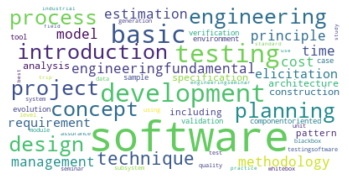

Cluster: 1


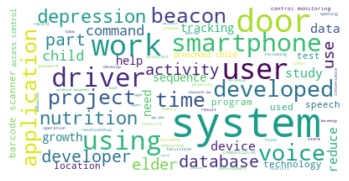

Cluster: 2


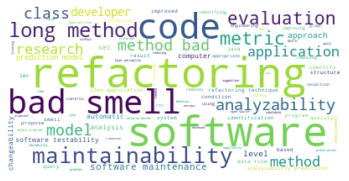

Cluster: 3


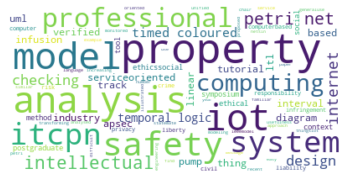

Cluster: 4


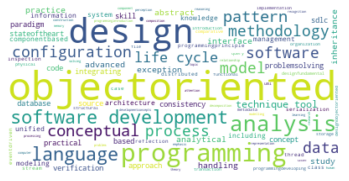

In [ ]:
result={'cluster':labels,'wiki':df3['text_clean']}
result=pd.DataFrame(result)
for k in range(0,n):
    s=result[result.cluster==k]
    text=s['wiki'].str.cat(sep=' ')
    text=text.lower()
    text=' '.join([word for word in text.split()])
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
    print('Cluster: {}'.format(k))
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

**ผลจากการแบ่งกลุ่ม** : พบว่าจากการนำเอาข้อมูลมาประมวลผล พบว่ามีการจัดกลุ่มได้ทั้งหมด 5 กลุ่ม ซึ่งจากคำของแต่ละกลุ่ม ก็มีความเด่นชัดในเรื่องของความเชียวชาญ

>  cluster 0 : มีความเชี่ยวชาญเกี่ยวกับด้านSoftware Developer และ  Software Engineer

>  cluster 1 : มีความเชี่ยวชาญแนวโน้มไปทางด้านการพัฒนาระบบ

>  cluster 2 : มีความเชี่ยวชาญเกี่ยวกับด้านการปรับปรุง codeให้ดีขึ้น

>  cluster 3 : มีความเชี่ยวชาญเกี่ยวกับด้านระบบเชื่อมต่ออุปกรณ์คอมพิวเตอร์(Internet of Things)

>  cluster 4 : มีความเชี่ยวชาญเกี่ยวกับด้านการเขียนโปรแกรมเชิงวัตถุและออกแบบพัฒนาซอฟต์แวร์เชิงวัตถุ

# tnt

In [ ]:
df4=df.loc[df['Teacher'] == 'tnt']

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english' ,max_features = 20000)
X4 = vectorizer.fit_transform(df4['text_clean'])
tf_idf_norm = normalize(X4)
tf_idf_array = tf_idf_norm.toarray()

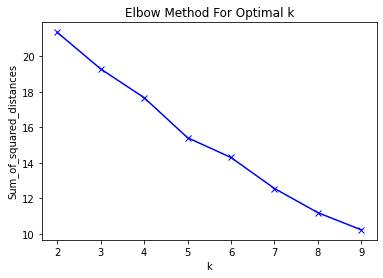

In [ ]:
Sum_of_squared_distances = []
K = range(2,10)
for k in K:
    km = KMeans(n_clusters=k, max_iter=200, n_init=10)
    km = km.fit(X4)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
n = 5
model = KMeans(n_clusters=n, init='k-means++', max_iter=200, n_init=10)
model.fit(X4)
labels=model.labels_
wiki_cl=pd.DataFrame(list(zip(df['Title'],labels)),columns=['title','cluster'])

Cluster: 0


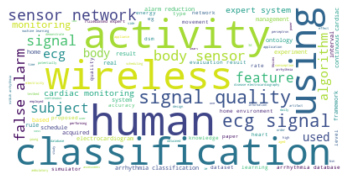

Cluster: 1


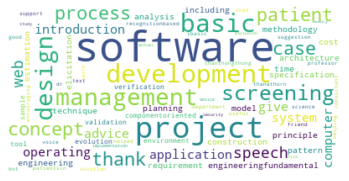

Cluster: 2


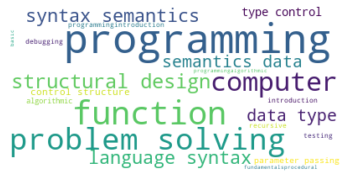

Cluster: 3


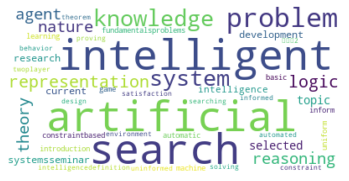

Cluster: 4


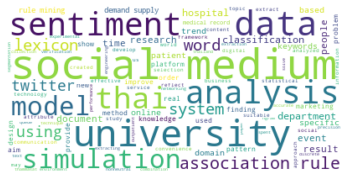

In [ ]:
result={'cluster':labels,'wiki':df4['text_clean']}
result=pd.DataFrame(result)
for k in range(0,n):
    s=result[result.cluster==k]
    text=s['wiki'].str.cat(sep=' ')
    text=text.lower()
    text=' '.join([word for word in text.split()])
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
    print('Cluster: {}'.format(k))
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

**ผลจากการแบ่งกลุ่ม** : พบว่าจากการนำเอาข้อมูลมาประมวลผล พบว่ามีการจัดกลุ่มได้ทั้งหมด 5 กลุ่ม ซึ่งจากคำของแต่ละกลุ่ม ก็มีความเด่นชัดในเรื่องของความเชียวชาญ

>  cluster 0 : มีความเชี่ยวชาญเกี่ยวกับการจำแนกพฤติกรรมนุษย์

>  cluster 1 : มีความเชี่ยวชาญเกี่ยวกับการบริหารจัดการงานทางด้านSoftware Developer

>  cluster 2 : มีความเชี่ยวชาญเกี่ยวกับด้านการแก้ปัญหาด้วยคอมพิวเตอร์

>  cluster 3 : มีความเชี่ยวชาญเกี่ยวกับด้าน Artificial Intelligence

>  cluster 4 : มีความเชี่ยวชาญเกี่ยวกับการวิเคราะห์ความรู้สึกและอารมณ์


# pkl

In [ ]:
df5=df.loc[df['Teacher'] == 'pkl']

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english' ,max_features = 20000)
X5 = vectorizer.fit_transform(df5['text_clean'])
tf_idf_norm = normalize(X5)
tf_idf_array = tf_idf_norm.toarray()

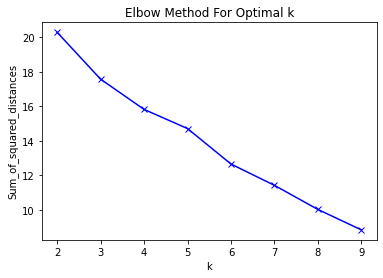

In [ ]:
Sum_of_squared_distances = []
K = range(2,10)
for k in K:
    km = KMeans(n_clusters=k, max_iter=200, n_init=10)
    km = km.fit(X5)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
n=4
model = KMeans(n_clusters=n, init='k-means++', max_iter=200, n_init=10)
model.fit(X5)
labels=model.labels_
wiki_cl=pd.DataFrame(list(zip(df['Title'],labels)),columns=['title','cluster'])

Cluster: 0


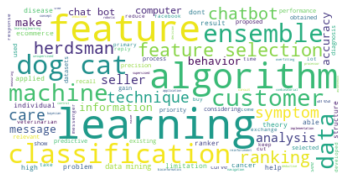

Cluster: 1


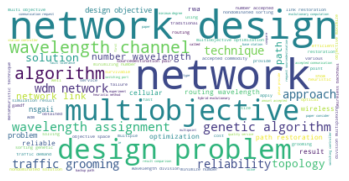

Cluster: 2


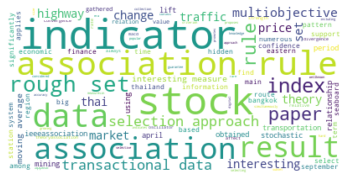

Cluster: 3


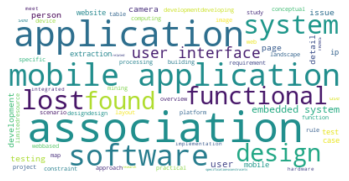

In [ ]:
result={'cluster':labels,'wiki':df5['text_clean']}
result=pd.DataFrame(result)
for k in range(0,n):
    s=result[result.cluster==k]
    text=s['wiki'].str.cat(sep=' ')
    text=text.lower()
    text=' '.join([word for word in text.split()])
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
    print('Cluster: {}'.format(k))
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

**ผลจากการแบ่งกลุ่ม** : พบว่าจากการนำเอาข้อมูลมาประมวลผล พบว่ามีการจัดกลุ่มได้ทั้งหมด 4 กลุ่ม ซึ่งจากคำของแต่ละกลุ่ม ก็มีความเด่นชัดในเรื่องของความเชียวชาญ

>  cluster 0 : มีความเชี่ยวชาญเกี่ยวกับด้าน Machine Learning

>  cluster 1 : มีความเชี่ยวชาญเกี่ยวกับการออกแบบเครือข่ายคอมพิวเตอร์

>  cluster 2 : มีความเชี่ยวชาญเกี่ยวกับควาสัมพันธ์ของข้อมูล

>  cluster 3 : มีความเชี่ยวชาญเกี่ยวกับการทำเหมืองข้อมูลความสัมพันธ์


# ppr

In [ ]:
df6=df.loc[df['Teacher'] == 'ppr']

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english' ,max_features = 20000)
X6 = vectorizer.fit_transform(df6['text_clean'])
tf_idf_norm = normalize(X6)
tf_idf_array = tf_idf_norm.toarray()

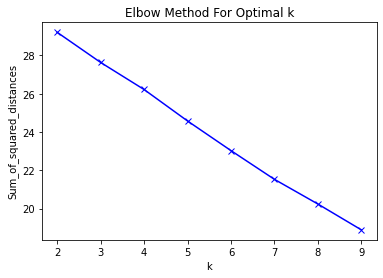

In [ ]:
Sum_of_squared_distances = []
K = range(2,10)
for k in K:
    km = KMeans(n_clusters=k, max_iter=200, n_init=10)
    km = km.fit(X6)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
n =4
model = KMeans(n_clusters=n, init='k-means++', max_iter=200, n_init=10)
model.fit(X6)
labels=model.labels_
wiki_cl=pd.DataFrame(list(zip(df['Title'],labels)),columns=['title','cluster'])

Cluster: 0


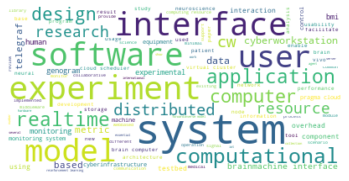

Cluster: 1


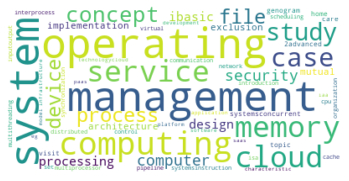

Cluster: 2


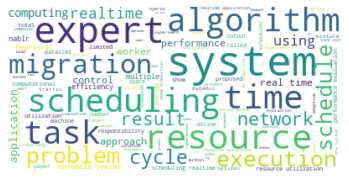

Cluster: 3


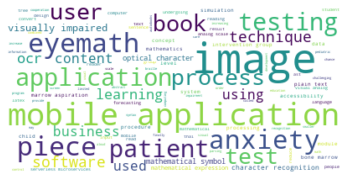

In [ ]:
result={'cluster':labels,'wiki':df6['text_clean']}
result=pd.DataFrame(result)
for k in range(0,n):
    s=result[result.cluster==k]
    text=s['wiki'].str.cat(sep=' ')
    text=text.lower()
    text=' '.join([word for word in text.split()])
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
    print('Cluster: {}'.format(k))
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

**ผลจากการแบ่งกลุ่ม** : พบว่าจากการนำเอาข้อมูลมาประมวลผล พบว่ามีการจัดกลุ่มได้ทั้งหมด 4 กลุ่ม ซึ่งจากคำของแต่ละกลุ่ม ก็มีความเด่นชัดในเรื่องของความเชียวชาญ

>  cluster 0 : มีความเชี่ยวชาญด้านการออกแบบการทดลอง (Design of Experiment)

>  cluster 1 : มีความเชี่ยวชาญเกี่ยวกับด้านการบริหารการปฏิบัติการ (Operations Management)

>  cluster 2 : มีความเชี่ยวชาญเกี่ยวกับอัลกอริทึมจัดตารางเวลา

>  cluster 3 : ความเชี่ยวชาญมีความกระจายไปทางด้าน Mobile Application และ การประมวลผลภาพ


# wjr

In [ ]:
df7=df.loc[df['Teacher'] == 'wjr']

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english' ,max_features = 20000)
X7 = vectorizer.fit_transform(df7['text_clean'])
tf_idf_norm = normalize(X7)
tf_idf_array = tf_idf_norm.toarray()

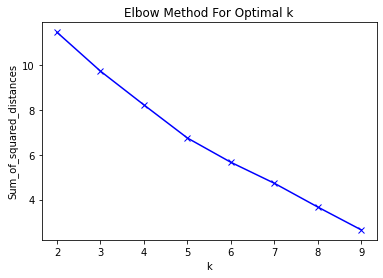

In [ ]:
Sum_of_squared_distances = []
K = range(2,10)
for k in K:
    km = KMeans(n_clusters=k, max_iter=200, n_init=10)
    km = km.fit(X7)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
n =5
model = KMeans(n_clusters=n, init='k-means++', max_iter=200, n_init=10)
model.fit(X7)
labels=model.labels_
wiki_cl=pd.DataFrame(list(zip(df['Title'],labels)),columns=['title','cluster'])

Cluster: 0


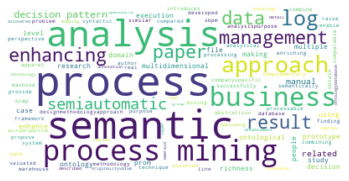

Cluster: 1


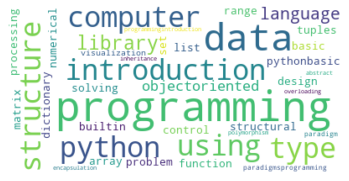

Cluster: 2


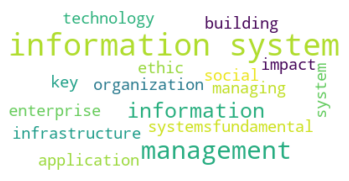

Cluster: 3


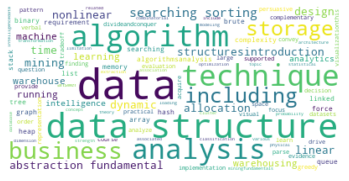

Cluster: 4


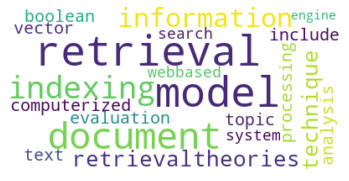

In [ ]:
result={'cluster':labels,'wiki':df7['text_clean']}
result=pd.DataFrame(result)
for k in range(0,n):
    s=result[result.cluster==k]
    text=s['wiki'].str.cat(sep=' ')
    text=text.lower()
    text=' '.join([word for word in text.split()])
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
    print('Cluster: {}'.format(k))
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

**ผลจากการแบ่งกลุ่ม** : พบว่าจากการนำเอาข้อมูลมาประมวลผล พบว่ามีการจัดกลุ่มได้ทั้งหมด 5 กลุ่ม ซึ่งจากคำของแต่ละกลุ่ม ก็มีความเด่นชัดในเรื่องของความเชียวชาญ

>  cluster 0 : มีความเชี่ยวชาญเกี่ยวกับด้านการวิเคราะห์ในเชิงความหมาย (Semantic Analysis)

>  cluster 1 : มีความเชี่ยวชาญเกี่ยวกับด้านภาษาโปรแกรม Python

>  cluster 2 : มีความเชี่ยวชาญเกี่ยวกับระบบสารสนเทศ (Information system)

>  cluster 3 : มีความเชี่ยวชาญมีความกระจายไปทางด้าน Data Analysis และ Data Structure

>  cluster 4 : มีความเชี่ยวชาญเกี่ยวกับการค้นคืนเอกสาร


# wlr

In [ ]:
df8=df.loc[df['Teacher'] == 'wlr']

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english' ,max_features = 20000)
X8 = vectorizer.fit_transform(df8['text_clean'])
tf_idf_norm = normalize(X8)
tf_idf_array = tf_idf_norm.toarray()

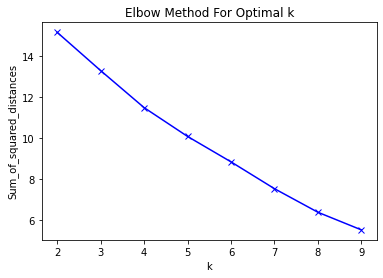

In [ ]:
Sum_of_squared_distances = []
K = range(2,10)
for k in K:
    km = KMeans(n_clusters=k, max_iter=200, n_init=10)
    km = km.fit(X8)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
n =5
model = KMeans(n_clusters=n, init='k-means++', max_iter=200, n_init=10)
model.fit(X8)
labels=model.labels_
wiki_cl=pd.DataFrame(list(zip(df['Title'],labels)),columns=['title','cluster'])

Cluster: 0


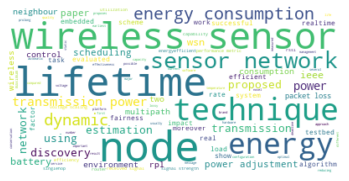

Cluster: 1


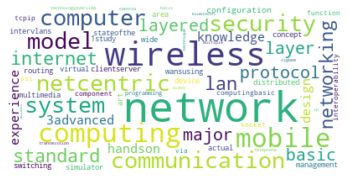

Cluster: 2


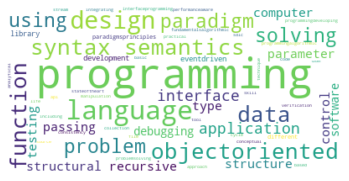

Cluster: 3


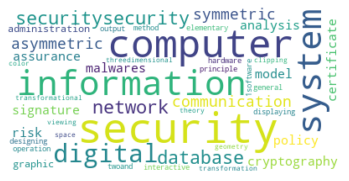

Cluster: 4


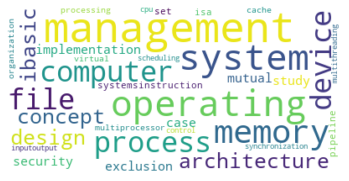

In [ ]:
result={'cluster':labels,'wiki':df8['text_clean']}
result=pd.DataFrame(result)
for k in range(0,n):
    s=result[result.cluster==k]
    text=s['wiki'].str.cat(sep=' ')
    text=text.lower()
    text=' '.join([word for word in text.split()])
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
    print('Cluster: {}'.format(k))
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

**ผลจากการแบ่งกลุ่ม** : พบว่าจากการนำเอาข้อมูลมาประมวลผล พบว่ามีการจัดกลุ่มได้ทั้งหมด 5 กลุ่ม ซึ่งจากคำของแต่ละกลุ่ม ก็มีความเด่นชัดในเรื่องของความเชียวชาญ

>  cluster 0 : มีความเชี่ยวชาญเกี่ยวกับระบบเครือข่ายเซ็นเซอร์ไร้สาย ( Wireless Sensor Network )

>  cluster 1 : มีความเชี่ยวชาญเกี่ยวกับระบบเครือข่ายคอมพิวเตอร์

>  cluster 2 : มีความเชี่ยวชาญเกี่ยวกับด้านObject-oriented programming

>  cluster 3 : มีความเชี่ยวชาญเกี่ยวกับด้าน Computer security

>  cluster 4 : มีความเชี่ยวชาญเกี่ยวกับการจัดการเกี่ยวกับกระบวนการ(Process Management)และ ระบบปฏิบัติการ (operating system)


# ojs

In [ ]:
df9=df.loc[df['Teacher'] == 'ojs']

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english' ,max_features = 20000)
X9 = vectorizer.fit_transform(df9['text_clean'])
tf_idf_norm = normalize(X9)
tf_idf_array = tf_idf_norm.toarray()

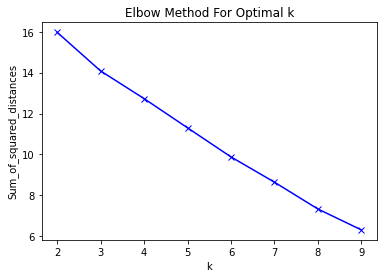

In [ ]:
Sum_of_squared_distances = []
K = range(2,10)
for k in K:
    km = KMeans(n_clusters=k, max_iter=200, n_init=10)
    km = km.fit(X9)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
n =3
model = KMeans(n_clusters=n, init='k-means++', max_iter=200, n_init=10)
model.fit(X9)
labels=model.labels_
wiki_cl=pd.DataFrame(list(zip(df['Title'],labels)),columns=['title','cluster'])

Cluster: 0


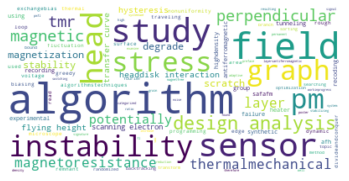

Cluster: 1


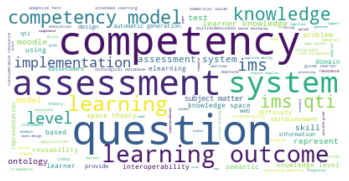

Cluster: 2


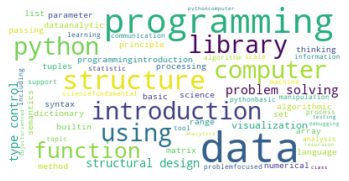

In [ ]:
result={'cluster':labels,'wiki':df9['text_clean']}
result=pd.DataFrame(result)
for k in range(0,n):
    s=result[result.cluster==k]
    text=s['wiki'].str.cat(sep=' ')
    text=text.lower()
    text=' '.join([word for word in text.split()])
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
    print('Cluster: {}'.format(k))
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

**ผลจากการแบ่งกลุ่ม** : พบว่าจากการนำเอาข้อมูลมาประมวลผล พบว่ามีการจัดกลุ่มได้ทั้งหมด 3 กลุ่ม ซึ่งจากคำของแต่ละกลุ่ม ก็มีความเด่นชัดในเรื่องของความเชียวชาญ

>  cluster 0 : มีความเชี่ยวชาญเกี่ยวกับอัลกอริทึมสำหรับเครือข่ายเซนเซอร์

>  cluster 1 : มีความเชี่ยวชาญเกี่ยวกับการประเมินสมรรถนะ (Competency Assessment)

>  cluster 2 : มีความเชี่ยวชาญเกี่ยวกับโครงสร้างข้อมูล (Data Structure)และ โปรแกรมโครงสร้าง (Structured Programming)


# yao

In [ ]:
df10=df.loc[df['Teacher'] == 'yao']

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english' ,max_features = 20000)
X10 = vectorizer.fit_transform(df10['text_clean'])
tf_idf_norm = normalize(X10)
tf_idf_array = tf_idf_norm.toarray()

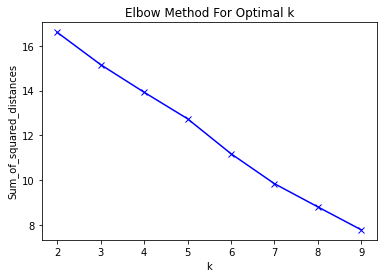

In [ ]:
Sum_of_squared_distances = []
K = range(2,10)
for k in K:
    km = KMeans(n_clusters=k, max_iter=200, n_init=10)
    km = km.fit(X10)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
n =5
model = KMeans(n_clusters=n, init='k-means++', max_iter=200, n_init=10)
model.fit(X10)
labels=model.labels_
wiki_cl=pd.DataFrame(list(zip(df['Title'],labels)),columns=['title','cluster'])

Cluster: 0


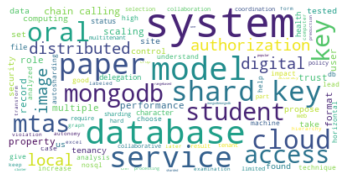

Cluster: 1


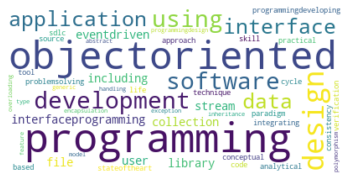

Cluster: 2


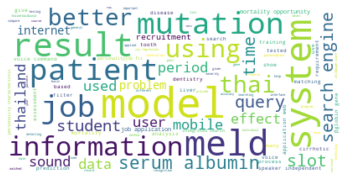

Cluster: 3


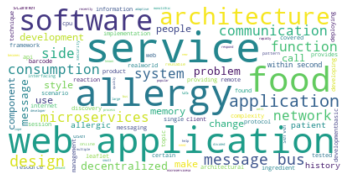

Cluster: 4


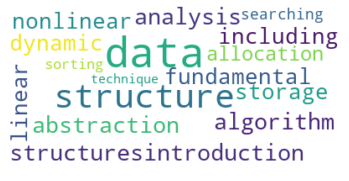

In [ ]:
result={'cluster':labels,'wiki':df10['text_clean']}
result=pd.DataFrame(result)
for k in range(0,n):
    s=result[result.cluster==k]
    text=s['wiki'].str.cat(sep=' ')
    text=text.lower()
    text=' '.join([word for word in text.split()])
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
    print('Cluster: {}'.format(k))
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

**ผลจากการแบ่งกลุ่ม** : พบว่าจากการนำเอาข้อมูลมาประมวลผล พบว่ามีการจัดกลุ่มได้ทั้งหมด 5 กลุ่ม ซึ่งจากคำของแต่ละกลุ่ม ก็มีความเด่นชัดในเรื่องของความเชียวชาญ

>  cluster 0 : มีความเชี่ยวชาญเกี่ยวกับระบบฐานข้อมูล (Database System)และ Cloud Service

>  cluster 1 : มีความเชี่ยวชาญเกี่ยวกับObject-oriented programming

>  cluster 2 : มีความเชี่ยวชาญการรวมกันและการกลายพันธุ์

>  cluster 3 : มีความเชี่ยวชาญเกี่ยวกับ Web Application 

>  cluster 4 : มีความเชี่ยวชาญเกี่ยวกับโครงสร้างข้อมูล (Data Structure)และ Data Analysis



# nth

In [ ]:
df11=df.loc[df['Teacher'] == 'nth']

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english' ,max_features = 20000)
X11 = vectorizer.fit_transform(df11['text_clean'])
tf_idf_norm = normalize(X11)
tf_idf_array = tf_idf_norm.toarray()

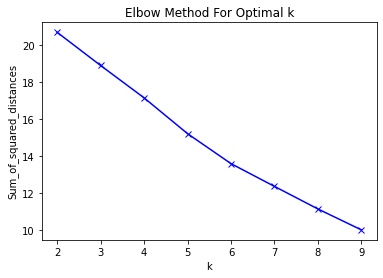

In [ ]:
Sum_of_squared_distances = []
K = range(2,10)
for k in K:
    km = KMeans(n_clusters=k, max_iter=200, n_init=10)
    km = km.fit(X11)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
n =5
model = KMeans(n_clusters=n, init='k-means++', max_iter=200, n_init=10)
model.fit(X11)
labels=model.labels_
wiki_cl=pd.DataFrame(list(zip(df['Title'],labels)),columns=['title','cluster'])

Cluster: 0


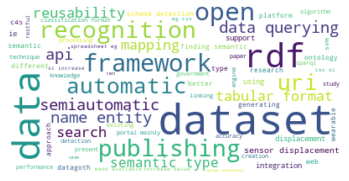

Cluster: 1


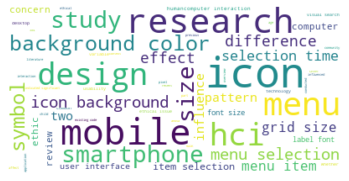

Cluster: 2


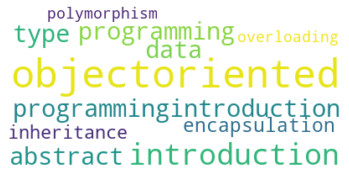

Cluster: 3


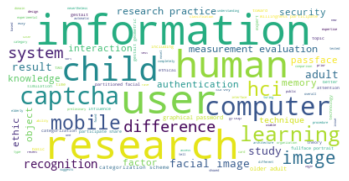

Cluster: 4


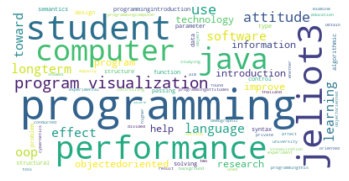

In [ ]:
result={'cluster':labels,'wiki':df11['text_clean']}
result=pd.DataFrame(result)
for k in range(0,n):
    s=result[result.cluster==k]
    text=s['wiki'].str.cat(sep=' ')
    text=text.lower()
    text=' '.join([word for word in text.split()])
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
    print('Cluster: {}'.format(k))
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

**ผลจากการแบ่งกลุ่ม** : พบว่าจากการนำเอาข้อมูลมาประมวลผล พบว่ามีการจัดกลุ่มได้ทั้งหมด 5 กลุ่ม ซึ่งจากคำของแต่ละกลุ่ม ก็มีความเด่นชัดในเรื่องของความเชียวชาญ

>  cluster 0 : มีความเชี่ยวชาญเกี่ยวกับการรับรู้ของข้อมูล

>  cluster 1 : มีความเชี่ยวชาญเกี่ยวกับการออกแบบและ Human-Computer Interaction

>  cluster 2 : มีความเชี่ยวชาญเกี่ยวกับObject-oriented programming

>  cluster 3 : มีความเชี่ยวชาญเกี่ยวกับกลไกอัตโนมัติที่ใช้ทดสอบผู้ใช้ที่เป็นมนุษย์

>  cluster 4 : มีความเชี่ยวชาญเกี่ยวกับด้านภาษาโปรแกรม Java


# tpb

In [ ]:
df12=df.loc[df['Teacher'] == 'tpb']
df12

Unnamed: 0  ...                                         text_clean
12           12  ...  multiaspect embedding attributeaware trajector...
17           17  ...  gridbased dbscan indexing inferencedbscan one ...
464         532  ...  artificial intelligence practiceprobabilistic ...
470         538  ...  natural language processingdeterministic stoch...
487         555  ...  computer programming businesscomputer programm...
512         580  ...  modeling data sciencefundamentals statistical ...
526         594  ...  natural language processingdeterministic stoch...

[7 rows x 8 columns]

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english' ,max_features = 20000)
X12 = vectorizer.fit_transform(df12['text_clean'])
tf_idf_norm = normalize(X12)
tf_idf_array = tf_idf_norm.toarray()

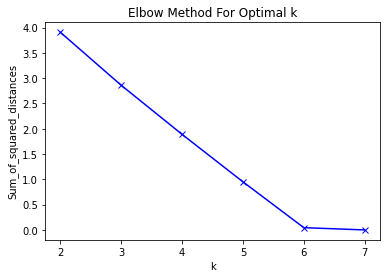

In [ ]:
Sum_of_squared_distances = []
K = range(2,8)
for k in K:
    km = KMeans(n_clusters=k, max_iter=200, n_init=10)
    km = km.fit(X12)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
n =6
model = KMeans(n_clusters=n, init='k-means++', max_iter=200, n_init=10)
model.fit(X12)
labels=model.labels_
wiki_cl=pd.DataFrame(list(zip(df['Title'],labels)),columns=['title','cluster'])

Cluster: 0


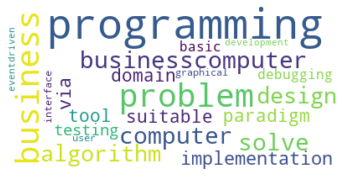

Cluster: 1


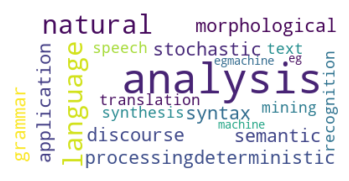

Cluster: 2


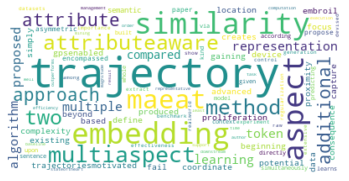

Cluster: 3


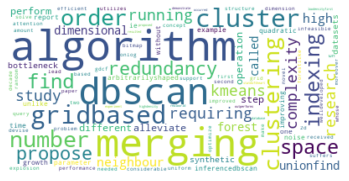

Cluster: 4


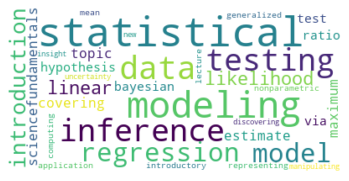

Cluster: 5


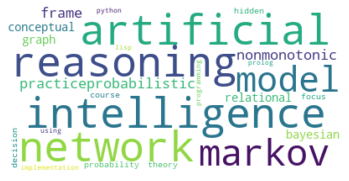

In [ ]:
result={'cluster':labels,'wiki':df12['text_clean']}
result=pd.DataFrame(result)
for k in range(0,n):
    s=result[result.cluster==k]
    text=s['wiki'].str.cat(sep=' ')
    text=text.lower()
    text=' '.join([word for word in text.split()])
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
    print('Cluster: {}'.format(k))
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

**ผลจากการแบ่งกลุ่ม** : พบว่าจากการนำเอาข้อมูลมาประมวลผล พบว่ามีการจัดกลุ่มได้ทั้งหมด 6 กลุ่ม ซึ่งจากคำของแต่ละกลุ่ม ก็มีความเด่นชัดในเรื่องของความเชียวชาญ

>  cluster 0 : มีความเชี่ยวชาญเกี่ยวกับการเขียนโปแกรมคอมพิวเตอร์สำหรับธุรกิจ 

>  cluster 1 : มีความเชี่ยวชาญเกี่ยวกับการประมวลผลภาษาธรรมชาติ( Natural language processing)

>  cluster 2 : มีความเชี่ยวชาญเกี่ยวกับความคล้ายคลึง
>  cluster 3 : มีความเชี่ยวชาญเกี่ยวกับด้านของอัลกอริทึมการจัดกลุ่มและการจัดเรียง

>  cluster 4 : มีความเชี่ยวชาญเกี่ยวกับสถิติและการสร้างแบบจำลองข้อมูล

>  cluster 5 : มีความเชี่ยวชาญเกี่ยวกับด้าน Artificial Intelligence


# pps

In [ ]:
df13=df.loc[df['Teacher'] == 'pps']

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english' ,max_features = 20000)
X13 = vectorizer.fit_transform(df13['text_clean'])
tf_idf_norm = normalize(X13)
tf_idf_array = tf_idf_norm.toarray()

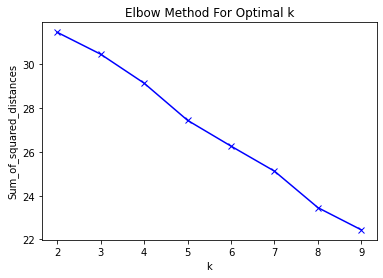

In [ ]:
Sum_of_squared_distances = []
K = range(2,10)
for k in K:
    km = KMeans(n_clusters=k, max_iter=200, n_init=10)
    km = km.fit(X13)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
n =5
model = KMeans(n_clusters=n, init='k-means++', max_iter=200, n_init=10)
model.fit(X13)
labels=model.labels_
wiki_cl=pd.DataFrame(list(zip(df['Title'],labels)),columns=['title','cluster'])

Cluster: 0


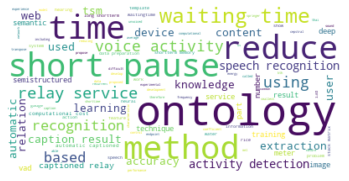

Cluster: 1


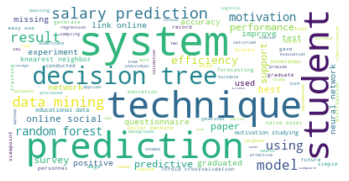

Cluster: 2


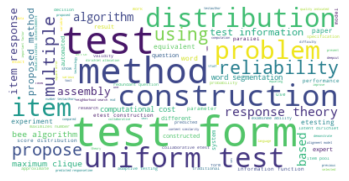

Cluster: 3


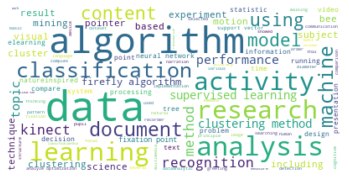

Cluster: 4


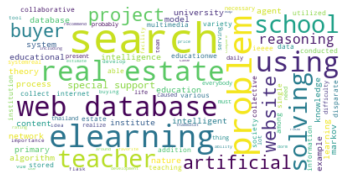

In [ ]:
result={'cluster':labels,'wiki':df13['text_clean']}
result=pd.DataFrame(result)
for k in range(0,n):
    s=result[result.cluster==k]
    text=s['wiki'].str.cat(sep=' ')
    text=text.lower()
    text=' '.join([word for word in text.split()])
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
    print('Cluster: {}'.format(k))
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

**ผลจากการแบ่งกลุ่ม** : พบว่าจากการนำเอาข้อมูลมาประมวลผล พบว่ามีการจัดกลุ่มได้ทั้งหมด 5 กลุ่ม ซึ่งจากคำของแต่ละกลุ่ม ก็มีความเด่นชัดในเรื่องของความเชียวชาญ

>  cluster 0 : มีความเชี่ยวชาญเกี่ยวกับ

>  cluster 1 : มีความเชี่ยวชาญเกี่ยวกับเทคนิคในการทำนายและตัดสินใจ

>  cluster 2 : มีความเชี่ยวชาญเกี่ยวกับด้านการทดสอบ (test method)

>  cluster 3 : มีความเชี่ยวชาญเกี่ยวกับการวิเคราะห์ข้อมูล

>  cluster 4 : มีความเชี่ยวชาญเกี่ยวกับด้านการเรียนแบบ e-learning 


# mvp

In [ ]:
df14=df.loc[df['Teacher'] == 'mvp']

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english' ,max_features = 20000)
X14 = vectorizer.fit_transform(df14['text_clean'])
tf_idf_norm = normalize(X14)
tf_idf_array = tf_idf_norm.toarray()

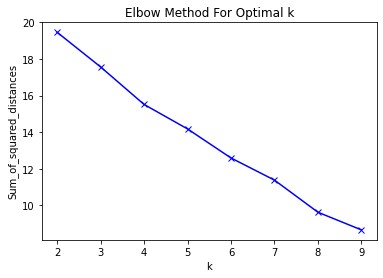

In [ ]:
Sum_of_squared_distances = []
K = range(2,10)
for k in K:
    km = KMeans(n_clusters=k, max_iter=200, n_init=10)
    km = km.fit(X14)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
n =4
model = KMeans(n_clusters=n, init='k-means++', max_iter=200, n_init=10)
model.fit(X14)
labels=model.labels_
wiki_cl=pd.DataFrame(list(zip(df['Title'],labels)),columns=['title','cluster'])

Cluster: 0


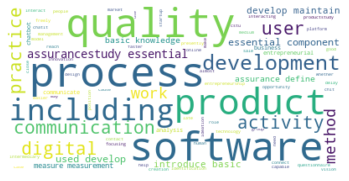

Cluster: 1


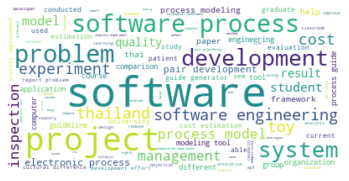

Cluster: 2


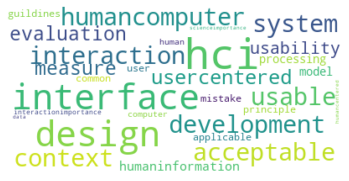

Cluster: 3


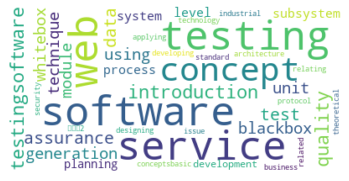

In [ ]:
result={'cluster':labels,'wiki':df14['text_clean']}
result=pd.DataFrame(result)
for k in range(0,n):
    s=result[result.cluster==k]
    text=s['wiki'].str.cat(sep=' ')
    text=text.lower()
    text=' '.join([word for word in text.split()])
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
    print('Cluster: {}'.format(k))
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

**ผลจากการแบ่งกลุ่ม** : พบว่าจากการนำเอาข้อมูลมาประมวลผล พบว่ามีการจัดกลุ่มได้ทั้งหมด 4 กลุ่ม ซึ่งจากคำของแต่ละกลุ่ม ก็มีความเด่นชัดในเรื่องของความเชียวชาญ

>  cluster 0 : มีความเชี่ยวชาญเกี่ยวกับกระบวนการซอฟต์แวร์(Software Process)

>  cluster 1 : มีความเชี่ยวชาญเกี่ยวกับกระบวนการซอฟต์แวร์(Software Process)

>  cluster 2 : มีความเชี่ยวชาญเกี่ยวกับการออกแบบและ Human-Computer Interaction

>  cluster 3 : มีความเชี่ยวชาญเกี่ยวกับการทดสอบซอฟต์แวร์(Software Testing)


# lpp

In [ ]:
df15=df.loc[df['Teacher'] == 'lpp']

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english' ,max_features = 20000)
X15 = vectorizer.fit_transform(df15['text_clean'])
tf_idf_norm = normalize(X15)
tf_idf_array = tf_idf_norm.toarray()

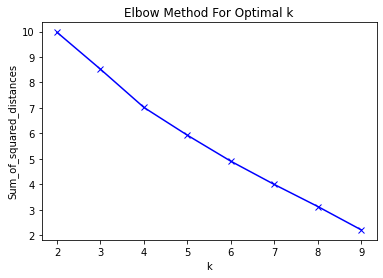

In [ ]:
Sum_of_squared_distances = []
K = range(2,10)
for k in K:
    km = KMeans(n_clusters=k, max_iter=200, n_init=10)
    km = km.fit(X15)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
n =3
model = KMeans(n_clusters=n, init='k-means++', max_iter=200, n_init=10)
model.fit(X15)
labels=model.labels_
wiki_cl=pd.DataFrame(list(zip(df['Title'],labels)),columns=['title','cluster'])

Cluster: 0


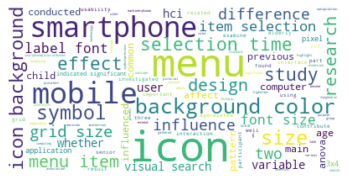

Cluster: 1


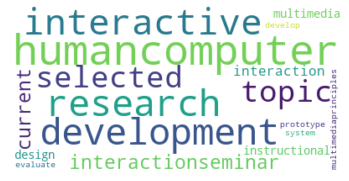

Cluster: 2


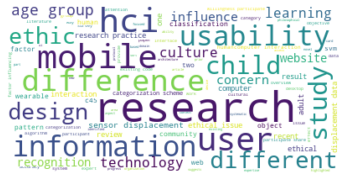

In [ ]:
result={'cluster':labels,'wiki':df15['text_clean']}
result=pd.DataFrame(result)
for k in range(0,n):
    s=result[result.cluster==k]
    text=s['wiki'].str.cat(sep=' ')
    text=text.lower()
    text=' '.join([word for word in text.split()])
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
    print('Cluster: {}'.format(k))
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

**ผลจากการแบ่งกลุ่ม** : พบว่าจากการนำเอาข้อมูลมาประมวลผล พบว่ามีการจัดกลุ่มได้ทั้งหมด 3 กลุ่ม ซึ่งจากคำของแต่ละกลุ่ม ก็มีความเด่นชัดในเรื่องของความเชียวชาญ

>  cluster 0 : มีความเชี่ยวชาญเกี่ยวกับการออกแบบการใช้สัญลักษณ์ สี พื้นหลังของโทรศัพท์

>  cluster 1 : มีความเชี่ยวชาญเกี่ยวกับการปฏิสัมพันธ์ระหว่างคนกับคอมพิวเตอร์ (Human computer interaction)

>  cluster 2 : มีความเชี่ยวชาญเกี่ยวกับด้าน Mobile Usability


# wdp

In [ ]:
df16=df.loc[df['Teacher'] == 'wdp']

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english' ,max_features = 20000)
X16 = vectorizer.fit_transform(df16['text_clean'])
tf_idf_norm = normalize(X16)
tf_idf_array = tf_idf_norm.toarray()

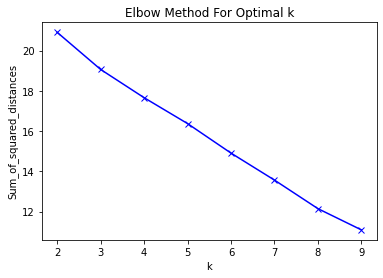

In [ ]:
Sum_of_squared_distances = []
K = range(2,10)
for k in K:
    km = KMeans(n_clusters=k, max_iter=200, n_init=10)
    km = km.fit(X16)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
n =4
model = KMeans(n_clusters=n, init='k-means++', max_iter=200, n_init=10)
model.fit(X16)
labels=model.labels_
wiki_cl=pd.DataFrame(list(zip(df['Title'],labels)),columns=['title','cluster'])

Cluster: 0


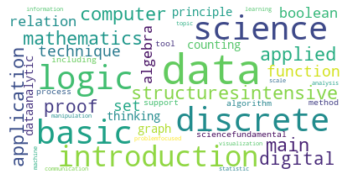

Cluster: 1


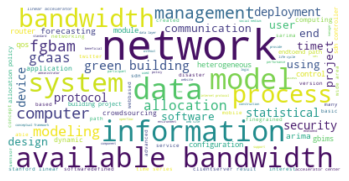

Cluster: 2


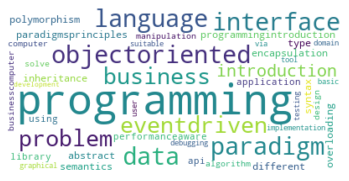

Cluster: 3


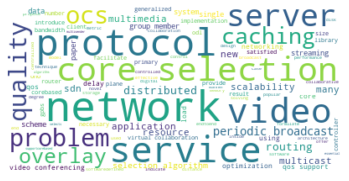

In [ ]:
result={'cluster':labels,'wiki':df16['text_clean']}
result=pd.DataFrame(result)
for k in range(0,n):
    s=result[result.cluster==k]
    text=s['wiki'].str.cat(sep=' ')
    text=text.lower()
    text=' '.join([word for word in text.split()])
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
    print('Cluster: {}'.format(k))
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

**ผลจากการแบ่งกลุ่ม** : พบว่าจากการนำเอาข้อมูลมาประมวลผล พบว่ามีการจัดกลุ่มได้ทั้งหมด 4 กลุ่ม ซึ่งจากคำของแต่ละกลุ่ม ก็มีความเด่นชัดในเรื่องของความเชียวชาญ

>  cluster 0 : มีความเชี่ยวชาญเกี่ยวกับด้าน data science

>  cluster 1 : มีความเชี่ยวชาญเกี่ยวกับด้านเครือข่าย(Network)

>  cluster 2 : มีความเชี่ยวชาญเกี่ยวกับ Object-oriented programming

>  cluster 3 : มีความเชี่ยวชาญเกี่ยวกับอ้างอิงเวลาของระบบเครือข่าย ( Network Time Protocol)


# nng

In [ ]:
df17=df.loc[df['Teacher'] == 'nng']

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english' ,max_features = 20000)
X17 = vectorizer.fit_transform(df17['text_clean'])
tf_idf_norm = normalize(X17)
tf_idf_array = tf_idf_norm.toarray()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  """


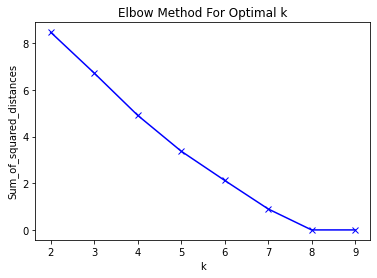

In [ ]:
Sum_of_squared_distances = []
K = range(2,10)
for k in K:
    km = KMeans(n_clusters=k, max_iter=200, n_init=10)
    km = km.fit(X17)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
n =4
model = KMeans(n_clusters=n, init='k-means++', max_iter=200, n_init=10)
model.fit(X17)
labels=model.labels_
wiki_cl=pd.DataFrame(list(zip(df['Title'],labels)),columns=['title','cluster'])

Cluster: 0


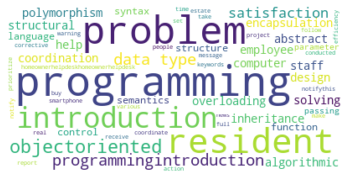

Cluster: 1


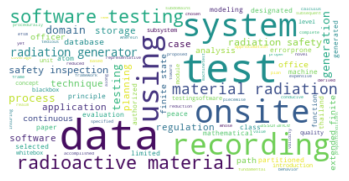

Cluster: 2


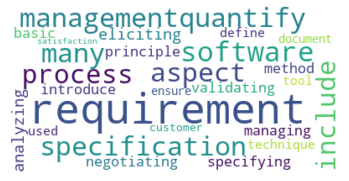

Cluster: 3


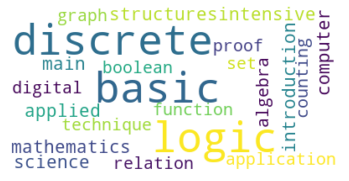

In [ ]:
result={'cluster':labels,'wiki':df17['text_clean']}
result=pd.DataFrame(result)
for k in range(0,n):
    s=result[result.cluster==k]
    text=s['wiki'].str.cat(sep=' ')
    text=text.lower()
    text=' '.join([word for word in text.split()])
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
    print('Cluster: {}'.format(k))
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

**ผลจากการแบ่งกลุ่ม** : พบว่าจากการนำเอาข้อมูลมาประมวลผล พบว่ามีการจัดกลุ่มได้ทั้งหมด 4 กลุ่ม ซึ่งจากคำของแต่ละกลุ่ม ก็มีความเด่นชัดในเรื่องของความเชียวชาญ

>  cluster 0 : มีความเชี่ยวชาญเกี่ยวกับ Object-oriented programming

>  cluster 1 : มีความเชี่ยวชาญเกี่ยวกับการใช้ Test Data ตรวจสอบความถูกต้องของระบบ

>  cluster 2 : มีความเชี่ยวชาญเกี่ยวกับการจัดการความต้องการ(Requirement Management)

>  cluster 3 : มีความเชี่ยวชาญเกี่ยวกับ Discreteว่าด้วยเนื้อหาเกี่ยวกับตรรกศาสตร์ (Logic)



# skn

In [ ]:
df18=df.loc[df['Teacher'] == 'skn']

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english' ,max_features = 20000)
X18 = vectorizer.fit_transform(df18['text_clean'])
tf_idf_norm = normalize(X18)
tf_idf_array = tf_idf_norm.toarray()

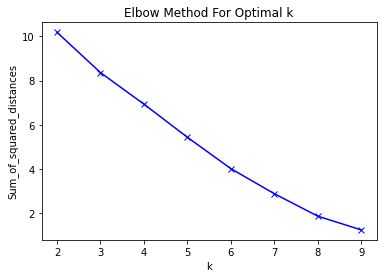

In [ ]:
Sum_of_squared_distances = []
K = range(2,10)
for k in K:
    km = KMeans(n_clusters=k, max_iter=200, n_init=10)
    km = km.fit(X18)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
n =3
model = KMeans(n_clusters=n, init='k-means++', max_iter=200, n_init=10)
model.fit(X18)
labels=model.labels_
wiki_cl=pd.DataFrame(list(zip(df['Title'],labels)),columns=['title','cluster'])

Cluster: 0


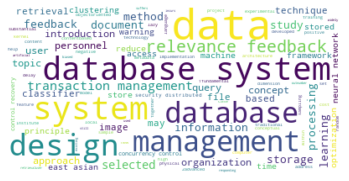

Cluster: 1


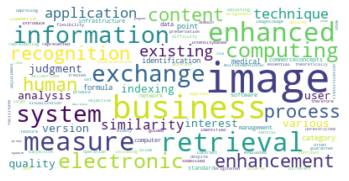

Cluster: 2


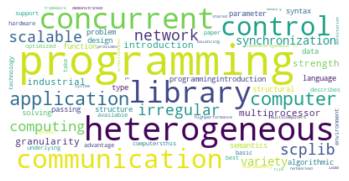

In [ ]:
result={'cluster':labels,'wiki':df18['text_clean']}
result=pd.DataFrame(result)
for k in range(0,n):
    s=result[result.cluster==k]
    text=s['wiki'].str.cat(sep=' ')
    text=text.lower()
    text=' '.join([word for word in text.split()])
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
    print('Cluster: {}'.format(k))
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

**ผลจากการแบ่งกลุ่ม** : พบว่าจากการนำเอาข้อมูลมาประมวลผล พบว่ามีการจัดกลุ่มได้ทั้งหมด 3 กลุ่ม ซึ่งจากคำของแต่ละกลุ่ม ก็มีความเด่นชัดในเรื่องของความเชียวชาญ

>  cluster 0 : มีความเชี่ยวชาญเกี่ยวกับการออกแบบฐานข้อมูล(database design)

>  cluster 1 : มีความเชี่ยวชาญเกี่ยวกับระบบค้นคืนด้วยเนื้อหาภาพ Content- Based Image Retrieva

>  cluster 2 : มีความเชี่ยวชาญเกี่ยวกับด้านการเขียนโปรแกรมแบบ Concurrent program


# ksc

In [ ]:
df19=df.loc[df['Teacher'] == 'ksc']

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english' ,max_features = 20000)
X19 = vectorizer.fit_transform(df19['text_clean'])
tf_idf_norm = normalize(X19)
tf_idf_array = tf_idf_norm.toarray()

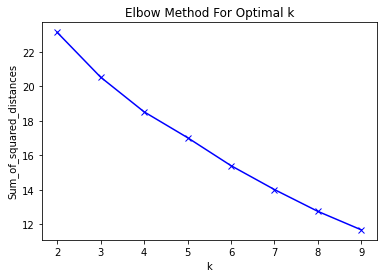

In [ ]:
Sum_of_squared_distances = []
K = range(2,10)
for k in K:
    km = KMeans(n_clusters=k, max_iter=200, n_init=10)
    km = km.fit(X19)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
n =4
model = KMeans(n_clusters=n, init='k-means++', max_iter=200, n_init=10)
model.fit(X19)
labels=model.labels_
wiki_cl=pd.DataFrame(list(zip(df['Title'],labels)),columns=['title','cluster'])

Cluster: 0


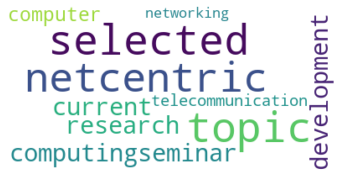

Cluster: 1


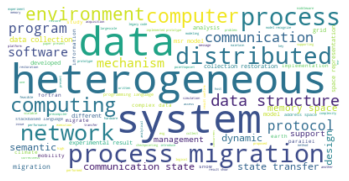

Cluster: 2


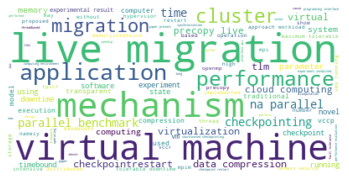

Cluster: 3


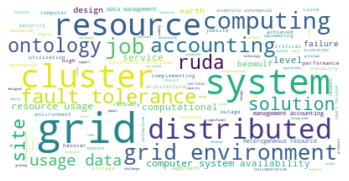

In [ ]:
result={'cluster':labels,'wiki':df19['text_clean']}
result=pd.DataFrame(result)
for k in range(0,n):
    s=result[result.cluster==k]
    text=s['wiki'].str.cat(sep=' ')
    text=text.lower()
    text=' '.join([word for word in text.split()])
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
    print('Cluster: {}'.format(k))
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

**ผลจากการแบ่งกลุ่ม** : พบว่าจากการนำเอาข้อมูลมาประมวลผล พบว่ามีการจัดกลุ่มได้ทั้งหมด 4 กลุ่ม ซึ่งจากคำของแต่ละกลุ่ม ก็มีความเด่นชัดในเรื่องของความเชียวชาญ

>  cluster 0 : มีความเชี่ยวชาญเกี่ยวกับการประมวลผลเครือข่าย (Net-Centric Computing)

>  cluster 1 : มีความเชี่ยวชาญเกี่ยวกับกระบวนการระบบของข้อมูลแบบกระจาย

>  cluster 2 : มีความเชี่ยวชาญเกี่ยวกับระบบปฏิบัติการ Virtual Machine

>  cluster 3 : มีความเชี่ยวชาญเกี่ยวกับระบบ Cluster Computing และ ระบบ Grid Computing


# wdc

In [ ]:
df20=df.loc[df['Teacher'] == 'wdc']

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english' ,max_features = 20000)
X20 = vectorizer.fit_transform(df20['text_clean'])
tf_idf_norm = normalize(X20)
tf_idf_array = tf_idf_norm.toarray()

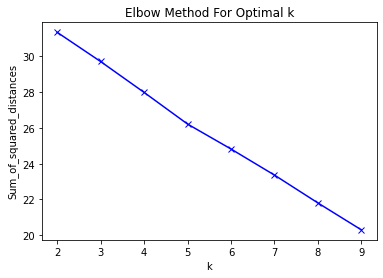

In [ ]:
Sum_of_squared_distances = []
K = range(2,10)
for k in K:
    km = KMeans(n_clusters=k, max_iter=200, n_init=10)
    km = km.fit(X20)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
n =5
model = KMeans(n_clusters=n, init='k-means++', max_iter=200, n_init=10)
model.fit(X20)
labels=model.labels_
wiki_cl=pd.DataFrame(list(zip(df['Title'],labels)),columns=['title','cluster'])

Cluster: 0


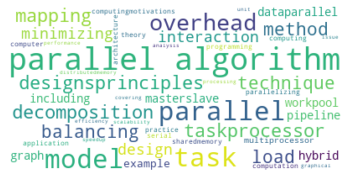

Cluster: 1


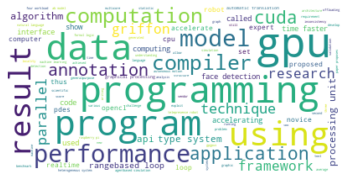

Cluster: 2


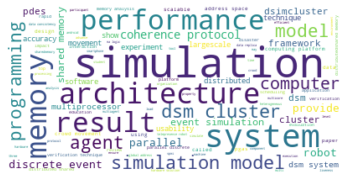

Cluster: 3


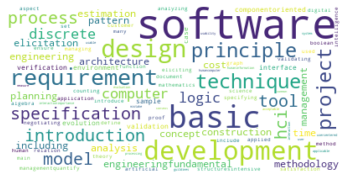

Cluster: 4


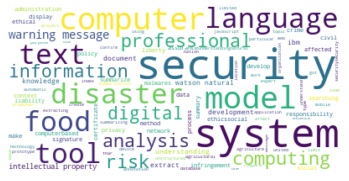

In [ ]:
result={'cluster':labels,'wiki':df20['text_clean']}
result=pd.DataFrame(result)
for k in range(0,n):
    s=result[result.cluster==k]
    text=s['wiki'].str.cat(sep=' ')
    text=text.lower()
    text=' '.join([word for word in text.split()])
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
    print('Cluster: {}'.format(k))
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

**ผลจากการแบ่งกลุ่ม** : พบว่าจากการนำเอาข้อมูลมาประมวลผล พบว่ามีการจัดกลุ่มได้ทั้งหมด 5 กลุ่ม ซึ่งจากคำของแต่ละกลุ่ม ก็มีความเด่นชัดในเรื่องของความเชียวชาญ

>  cluster 0 : มีความเชี่ยวชาญเกี่ยวกับขั้นตอนวิธีแบบขนาน(Parallel algorithms)

>  cluster 1 : มีความเชี่ยวชาญเกี่ยวกับด้านประสิทธิภาพของโปรแกรม

>  cluster 2 : มีความเชี่ยวชาญเกี่ยวกับการจำลองสถาปัตกรรมคอมพิวเตอร์

>  cluster 3 : มีความเชี่ยวชาญเกี่ยวกับการระบุข้อกำหนดซอฟต์แวร์ (Software Requirements Specification)

>  cluster 4 : มีความเชี่ยวชาญเกี่ยวกับความมั่นคงปลอดภัยของระบบสารสนเทศ (Information System Security)


# pkw

In [ ]:
df21=df.loc[df['Teacher'] == 'pkw']

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english' ,max_features = 20000)
X21 = vectorizer.fit_transform(df21['text_clean'])
tf_idf_norm = normalize(X21)
tf_idf_array = tf_idf_norm.toarray()

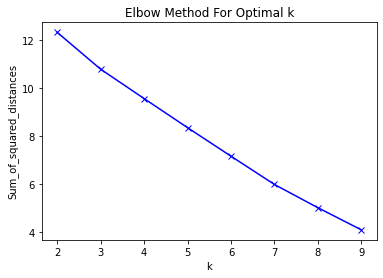

In [ ]:
Sum_of_squared_distances = []
K = range(2,10)
for k in K:
    km = KMeans(n_clusters=k, max_iter=200, n_init=10)
    km = km.fit(X21)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
n =3
model = KMeans(n_clusters=n, init='k-means++', max_iter=200, n_init=10)
model.fit(X21)
labels=model.labels_
wiki_cl=pd.DataFrame(list(zip(df['Title'],labels)),columns=['title','cluster'])

Cluster: 0


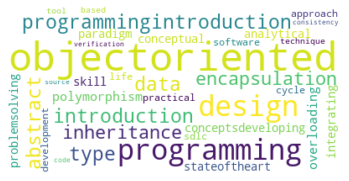

Cluster: 1


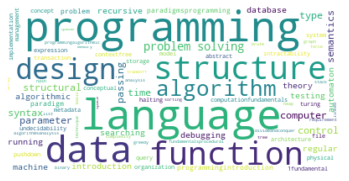

Cluster: 2


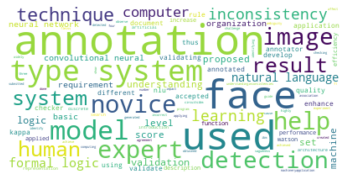

In [ ]:
result={'cluster':labels,'wiki':df21['text_clean']}
result=pd.DataFrame(result)
for k in range(0,n):
    s=result[result.cluster==k]
    text=s['wiki'].str.cat(sep=' ')
    text=text.lower()
    text=' '.join([word for word in text.split()])
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
    print('Cluster: {}'.format(k))
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

**ผลจากการแบ่งกลุ่ม** : พบว่าจากการนำเอาข้อมูลมาประมวลผล พบว่ามีการจัดกลุ่มได้ทั้งหมด 3 กลุ่ม ซึ่งจากคำของแต่ละกลุ่ม ก็มีความเด่นชัดในเรื่องของความเชี่ยวชาญ

>  cluster 0 : มีความเชี่ยวชาญเกี่ยวกับObject-oriented programming

>  cluster 1 : มีความเชี่ยวชาญเกี่ยวกับการโปรแกรมโครงสร้าง ( Structure Programming)

>  cluster 2 : มีความเชี่ยวชาญเกี่ยวกับระบบคำอธิบายประกอบ


# **Conclusion**

จากการ ใช้ K-mean ที่เป็น Unsupervised Learning ซึ่งเนื่องจากข้อมูลของเราไม่ได้จัดเป็นหมวดหมู่ที่ชัดเจน เมื่อนำเอา K-mean มาประยุกต์ใช้กับ tf-idf ทำให้ โมเดลที่ออกมามีการแบ่งกลุ่มคำได้เห็นภาพมากขึ้น และสามารถนำไปสู่การวิเคราะห์ความเชี่ยวชาญของแต่ละบุคคลได้ แต่ต้องมีการวิเคราะห์คำของแต่ละกลุ่มอีกทีนึง เพื่อตอบคำถามว่าคนๆนั้นมีความสามารถหรือเชี่ยวชาญด้านใดนั่นเอง


# **reference**

https://piratefache.ch/nlp-classification-hackernews-category-python

https://dzone.com/articles/interactive-topic-modeling-using-python

https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0

https://medium.com/@MSalnikov/text-clustering-with-k-means-and-tf-idf-f099bcf95183

https://nbviewer.jupyter.org/github/LucasTurtle/national-anthems-clustering/blob/master/Cluster_Anthems.ipynb